  # Fuzzy C-Means

In [4]:

import numpy as np
from numpy.linalg import norm
from sklearn import metrics
from matplotlib import pyplot as plt


In [5]:

def fcm(data_mat, c, m, max_iter, init=None):
    def calculate_centroids(data, w_mat):
        c_mat = np.zeros((w_mat.shape[1], data.shape[1]))
        for k in range(w_mat.shape[1]):
            c_mat[k,:] = ((w_mat[:, k].T ** m) @ data)
            c_mat[k,:] /= np.sum(w_mat[:, k] ** m)
        return c_mat

    def calculate_weights(data, c_mat, m):
        w_mat = np.zeros((data.shape[0], c_mat.shape[0]))
        for i in range(data.shape[0]):
            for j in range(c_mat.shape[0]):
                num = norm(data[i, :] - c_mat[j, :], 2)
                den = 0
                for k in range(c_mat.shape[0]):
                    den += norm(data[i, :] - c_mat[k, :], 2)
                w_mat[i, j] = 1 / ((num / den) ** (2 / (m - 1)))
            w_mat[i, :] /= np.sum(w_mat[i, :])
        return w_mat

    n, p = data_mat.shape
    if not init or init=="random":
        w_mat = np.random.rand(n, c)
    else:
        w_mat = init

    c_mat = calculate_centroids(data_mat, w_mat)
    c_mat_old = np.ones((c, p)) * np.inf
    i = 0

    while i < max_iter:
        c_mat_old = c_mat.copy()
        c_mat = calculate_centroids(data_mat, w_mat)
        w_mat = calculate_weights(data_mat, c_mat, m)
        i += 1

    return w_mat, c_mat



In [6]:

from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers,
    cluster_std=0.4, random_state=0,
    n_features=3, shuffle=True
)
X = StandardScaler().fit_transform(X)



In [7]:

weights, centroids = fcm(X, c=3, m=2, max_iter=50)

print(weights)
print(centroids)



[[0.00413749 0.0071246  0.98873791]
 [0.98522263 0.00974953 0.00502784]
 [0.02648587 0.04947516 0.92403897]
 ...
 [0.25769804 0.66408142 0.07822054]
 [0.81260106 0.10287373 0.08452521]
 [0.08964194 0.8659399  0.04441816]]
[[-1.31746085 -0.65536787]
 [ 0.70261887 -0.65594503]
 [ 0.62095235  1.3235834 ]]


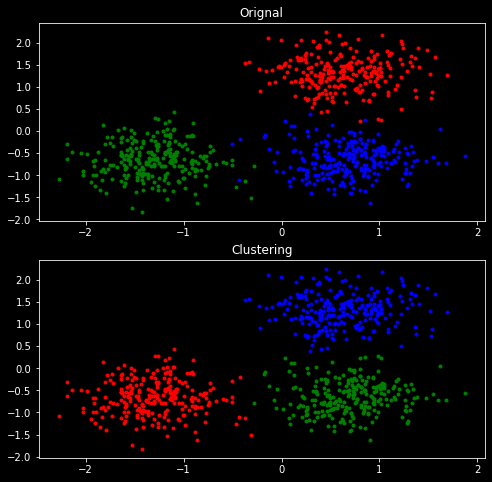

In [11]:

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(X[labels_true == 0, 0], X[labels_true == 0, 1], ".r")
plt.plot(X[labels_true == 1, 0], X[labels_true == 1, 1], ".g")
plt.plot(X[labels_true == 2, 0], X[labels_true == 2, 1], ".b")
plt.title("Orignal")
plt.subplot(2,1,2)
plt.plot(X[np.argmax(weights, axis=1) == 0, 0], X[np.argmax(weights, axis=1) == 0, 1], ".r")
plt.plot(X[np.argmax(weights, axis=1) == 1, 0], X[np.argmax(weights, axis=1) == 1, 1], ".g")
plt.plot(X[np.argmax(weights, axis=1) == 2, 0], X[np.argmax(weights, axis=1) == 2, 1], ".b")
plt.title("Clustering")
plt.show()


In [9]:

print("Completeness : ", metrics.completeness_score(
    labels_true,
    np.argmax(weights, axis=1)
))

print("Homogeneity : ", metrics.homogeneity_score(
    labels_true,
    np.argmax(weights, axis=1)
))


Completeness :  0.9447440484293818
Homogeneity :  0.9447257027810622


## Signification des métriques

  homogeneity: chaque clusters ne contient que des membres d'une seule classe.
  completeness: tous les membres d'une classe donnée sont assignés au même cluster.

  ## Conclusion sur l'implémentation du Fuzzy C-Means

  Les métriques ne sont pas faites spécifiquement pour tester les performances du clustering.
  Elles ont été utilisé en choisissant pour chaque point la classe qui avait la plus grande probabilité.

  Les résultats semblent très bons, plus de 90% de complitude et d'homogénéité.
  Il semblerait donc que la méthode soit bien implémentée.